In [1]:
from sklearn.decomposition import TruncatedSVD
import numpy as np

In [2]:
svd = TruncatedSVD(n_components=21, n_iter=7, random_state=42)

In [3]:
X = np.genfromtxt('./tables/svdtable.txt', delimiter='\t')

In [4]:
len(X)

200000

In [5]:
len(X[0])

216

In [6]:
ans_dense = svd.fit_transform(X)
ans_back = svd.inverse_transform(ans_dense)
np.savetxt("./tables/svdtableProjection.txt", ans_back, delimiter="\t")

In [7]:
ans_back

array([[  4.25211973e+00,  -3.72580335e-02,  -1.43513939e-16, ...,
         -6.80602832e-04,   5.20692974e-04,  -1.38577476e-02],
       [  3.21164270e+00,  -1.00691430e-02,   5.02573848e-17, ...,
          1.49207848e-03,   2.26543336e-02,   3.62574899e-02],
       [  3.17269210e+00,  -7.29527455e-03,   8.77904005e-17, ...,
         -1.96971881e-03,  -3.87836140e-03,  -2.44091549e-02],
       ..., 
       [  3.95807987e+00,   4.83675513e-02,  -1.24991695e-16, ...,
         -1.06011663e-03,  -6.28669250e-04,  -1.39080301e-02],
       [  4.06857972e+00,  -5.81007285e-03,   1.24148033e-17, ...,
         -1.77431883e-04,  -5.33813297e-04,   1.04354204e-03],
       [  3.20637887e+00,   2.90126501e-03,  -8.46377212e-17, ...,
         -3.06938897e-03,  -1.15417442e-02,  -2.09376859e-02]])

In [11]:
print("%15s %15s" %("Before","After"))
for i, j in zip(np.where(X!=0)[0][:10], np.where(X!=0)[1][:10]):
    print( "%15f %15f" % (X[i][j], ans_back[i][j]))

         Before           After
       4.250000        4.252120
       4.000000        3.997548
       5.000000        4.990879
       3.203822        3.211643
       2.777778        2.765629
       3.034483        3.036056
       3.666667        3.665905
       4.750000        4.741362
       3.400000        3.395423
       2.500000        2.490178


In [12]:
X[0]

array([ 4.25,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,

In [13]:
ans_back[0][:20]

array([  4.25211973e+00,  -3.72580335e-02,  -1.43513939e-16,
         3.81877528e-16,  -3.60707535e-02,  -6.39377110e-17,
         1.61997918e-17,  -3.47243968e-17,   3.58087538e-17,
        -3.15671033e-17,   3.00574181e-18,   2.19995831e-17,
        -2.09577529e-17,   8.74372634e-18,   4.13603231e-02,
        -6.39578313e-02,   5.02486971e-17,  -9.74853854e-17,
        -1.77308425e-02,  -3.47009249e-03])

# Kmeans

In [6]:
svd.fit(X)

TruncatedSVD(algorithm='randomized', n_components=21, n_iter=7,
       random_state=42, tol=0.0)

In [7]:
V = svd.components_[:20]

In [8]:
V

array([[  5.83956220e-01,   2.24931889e-02,  -1.13449218e-25, ...,
          4.54852032e-04,   2.79907140e-03,   7.46156502e-03],
       [ -5.32428058e-01,   3.66237026e-02,   6.47372231e-19, ...,
          1.51969827e-03,   9.05830767e-03,   1.89114467e-02],
       [  2.52773399e-01,  -1.46720295e-02,   7.46462940e-18, ...,
         -2.63932446e-04,  -3.55283149e-03,  -6.89110385e-03],
       ..., 
       [  2.04044269e-02,   4.37296009e-02,  -8.81460084e-18, ...,
         -1.20836132e-04,   3.34123631e-03,  -1.25531000e-03],
       [  1.77191963e-02,  -2.61537040e-02,  -1.68414471e-17, ...,
          1.50483113e-03,   4.56171333e-02,   3.51965724e-03],
       [ -2.29166556e-02,  -9.90953442e-02,   2.02823428e-18, ...,
          7.45745844e-04,   2.70114120e-02,  -9.71159278e-03]])

In [9]:
len(V)

20

In [10]:
len(V[0])

216

In [11]:
user_pre = np.inner(X, V)

In [12]:
len(user_pre)

200000

In [13]:
len(user_pre[0])

20

In [14]:
user_pre[0]

array([ 5.5107933 , -2.71790497, -2.68114297,  1.86296766,  0.05759208,
       -1.97361137, -1.92632456, -0.8316969 ,  0.98801495,  0.08046625,
       -0.72573739, -0.167905  ,  0.64687978, -0.02839384,  0.01019411,
        0.03955321, -0.03060934, -0.53381717,  0.18704668, -0.14261981])

In [15]:
from sklearn.cluster import KMeans
from sklearn import metrics

In [16]:
kmeans_model = KMeans(n_clusters=3, random_state=1).fit(user_pre)
labels = kmeans_model.labels_
metrics.silhouette_score(user_pre, labels, metric='euclidean', sample_size=20000)

0.11762075190940242

In [17]:
silhouette = []
for i in range(2,31):
    kmeans_model = KMeans(n_clusters=i, random_state=1).fit(user_pre)
    labels = kmeans_model.labels_
    silhouette.append([i,metrics.silhouette_score(user_pre, labels, metric='euclidean', sample_size=20000)])
    print("N cluster:", i)

N cluster: 2
N cluster: 3
N cluster: 4
N cluster: 5
N cluster: 6
N cluster: 7
N cluster: 8
N cluster: 9
N cluster: 10
N cluster: 11
N cluster: 12
N cluster: 13
N cluster: 14
N cluster: 15
N cluster: 16
N cluster: 17
N cluster: 18
N cluster: 19
N cluster: 20
N cluster: 21
N cluster: 22
N cluster: 23
N cluster: 24
N cluster: 25
N cluster: 26
N cluster: 27
N cluster: 28
N cluster: 29
N cluster: 30


In [18]:
from matplotlib import pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6 

In [19]:
silhouette = np.array(silhouette)

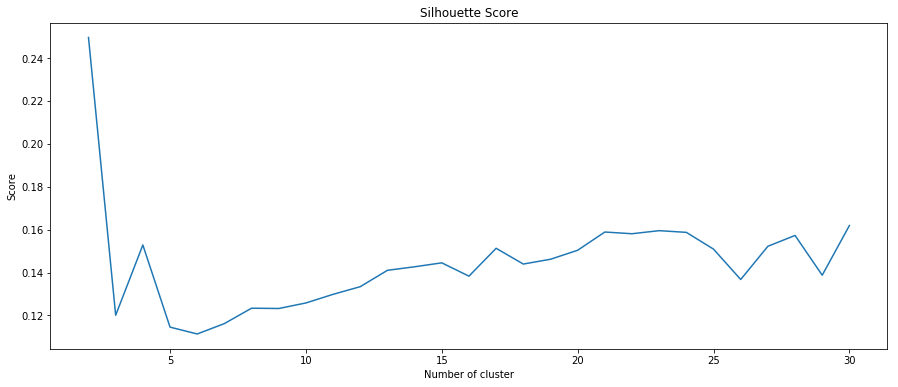

In [20]:
plt.plot(silhouette[:,0],silhouette[:,1])
plt.title('Silhouette Score')
plt.ylabel('Score')
plt.xlabel('Number of cluster')
plt.show()

In [21]:
silhouette = []
for i in range(31,60):
    kmeans_model = KMeans(n_clusters=i, random_state=1).fit(user_pre)
    labels = kmeans_model.labels_
    silhouette.append([i,metrics.silhouette_score(user_pre, labels, metric='euclidean', sample_size=20000)])
    print("N cluster:", i)

N cluster: 31
N cluster: 32
N cluster: 33
N cluster: 34
N cluster: 35
N cluster: 36
N cluster: 37
N cluster: 38
N cluster: 39
N cluster: 40
N cluster: 41
N cluster: 42
N cluster: 43
N cluster: 44
N cluster: 45
N cluster: 46
N cluster: 47
N cluster: 48
N cluster: 49
N cluster: 50
N cluster: 51
N cluster: 52
N cluster: 53
N cluster: 54
N cluster: 55
N cluster: 56
N cluster: 57
N cluster: 58
N cluster: 59


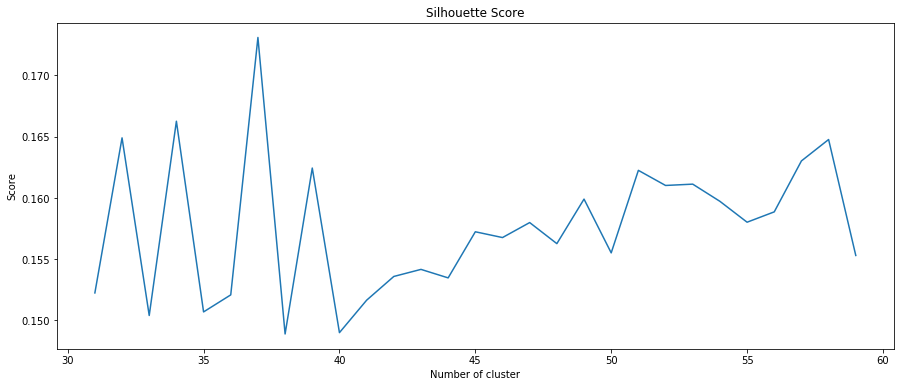

In [22]:
silhouette = np.array(silhouette)
plt.plot(silhouette[:,0],silhouette[:,1])
plt.title('Silhouette Score')
plt.ylabel('Score')
plt.xlabel('Number of cluster')
plt.show()

In [23]:
silhouette = []
for i in range(60,90):
    kmeans_model = KMeans(n_clusters=i, random_state=1).fit(user_pre)
    labels = kmeans_model.labels_
    silhouette.append([i,metrics.silhouette_score(user_pre, labels, metric='euclidean', sample_size=20000)])
    print("N cluster:", i)

N cluster: 60
N cluster: 61
N cluster: 62
N cluster: 63
N cluster: 64
N cluster: 65
N cluster: 66
N cluster: 67
N cluster: 68
N cluster: 69
N cluster: 70
N cluster: 71
N cluster: 72
N cluster: 73
N cluster: 74
N cluster: 75
N cluster: 76
N cluster: 77
N cluster: 78
N cluster: 79
N cluster: 80
N cluster: 81
N cluster: 82
N cluster: 83
N cluster: 84
N cluster: 85
N cluster: 86
N cluster: 87
N cluster: 88
N cluster: 89


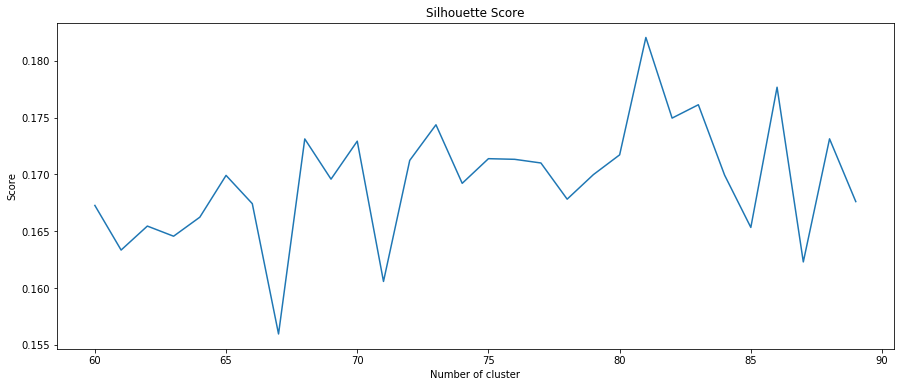

In [24]:
silhouette = np.array(silhouette)
plt.plot(silhouette[:,0],silhouette[:,1])
plt.title('Silhouette Score')
plt.ylabel('Score')
plt.xlabel('Number of cluster')
plt.show()

In [25]:
silhouette = []
for i in range(2,90):
    kmeans_model = KMeans(n_clusters=i, random_state=1).fit(user_pre)
    labels = kmeans_model.labels_
    silhouette.append([i,metrics.silhouette_score(user_pre, labels, metric='euclidean', sample_size=20000)])
    print("N cluster:", i)

N cluster: 2
N cluster: 3
N cluster: 4
N cluster: 5
N cluster: 6
N cluster: 7
N cluster: 8
N cluster: 9
N cluster: 10
N cluster: 11
N cluster: 12
N cluster: 13
N cluster: 14
N cluster: 15
N cluster: 16
N cluster: 17
N cluster: 18
N cluster: 19
N cluster: 20
N cluster: 21
N cluster: 22
N cluster: 23
N cluster: 24
N cluster: 25
N cluster: 26
N cluster: 27
N cluster: 28
N cluster: 29
N cluster: 30
N cluster: 31
N cluster: 32
N cluster: 33
N cluster: 34
N cluster: 35
N cluster: 36
N cluster: 37
N cluster: 38
N cluster: 39
N cluster: 40
N cluster: 41
N cluster: 42
N cluster: 43
N cluster: 44
N cluster: 45
N cluster: 46
N cluster: 47
N cluster: 48
N cluster: 49
N cluster: 50
N cluster: 51
N cluster: 52
N cluster: 53
N cluster: 54
N cluster: 55
N cluster: 56
N cluster: 57
N cluster: 58
N cluster: 59
N cluster: 60
N cluster: 61
N cluster: 62
N cluster: 63
N cluster: 64
N cluster: 65
N cluster: 66
N cluster: 67
N cluster: 68
N cluster: 69
N cluster: 70
N cluster: 71
N cluster: 72
N cluster: 73


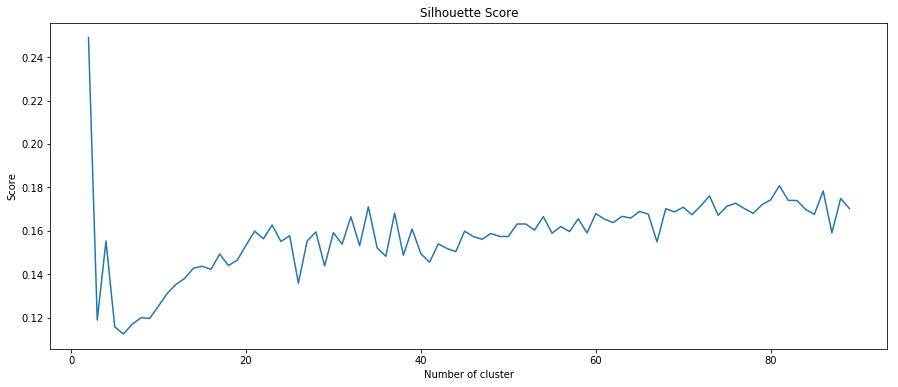

In [26]:
silhouette = np.array(silhouette)
plt.plot(silhouette[:,0],silhouette[:,1])
plt.title('Silhouette Score')
plt.ylabel('Score')
plt.xlabel('Number of cluster')
plt.show()